In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset
bike_data = pd.read_csv('C:\\Users\\4357\\Desktop\\Project\\bike project\\day.csv')
bike_data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
# Data Cleaning and Preprocessing
# Convert season and weathersit to categorical
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice'
}

bike_data['season'] = bike_data['season'].map(season_mapping)
bike_data['weathersit'] = bike_data['weathersit'].map(weathersit_mapping)


In [9]:
# Convert date to datetime and handle inconsistent formats
bike_data['dteday'] = pd.to_datetime(bike_data['dteday'], format='%d-%m-%Y', errors='coerce')


In [11]:
# Drop rows with invalid dates
bike_data = bike_data.dropna(subset=['dteday'])


In [13]:
# Extract numeric information from date
bike_data['year'] = bike_data['dteday'].dt.year
bike_data['month'] = bike_data['dteday'].dt.month
bike_data['day'] = bike_data['dteday'].dt.day


# Check for missing values
print("Missing values:")
print(bike_data.isnull().sum())

Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
day           0
dtype: int64


In [15]:
# Data Cleaning and Preprocessing
# Convert season and weathersit to categorical
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Ice'
}

bike_data['season'] = bike_data['season'].map(season_mapping)
bike_data['weathersit'] = bike_data['weathersit'].map(weathersit_mapping)


In [17]:
# Exploratory Data Analysis
# Drop non-numeric columns before correlation
numeric_data = bike_data.select_dtypes(include=[np.number])


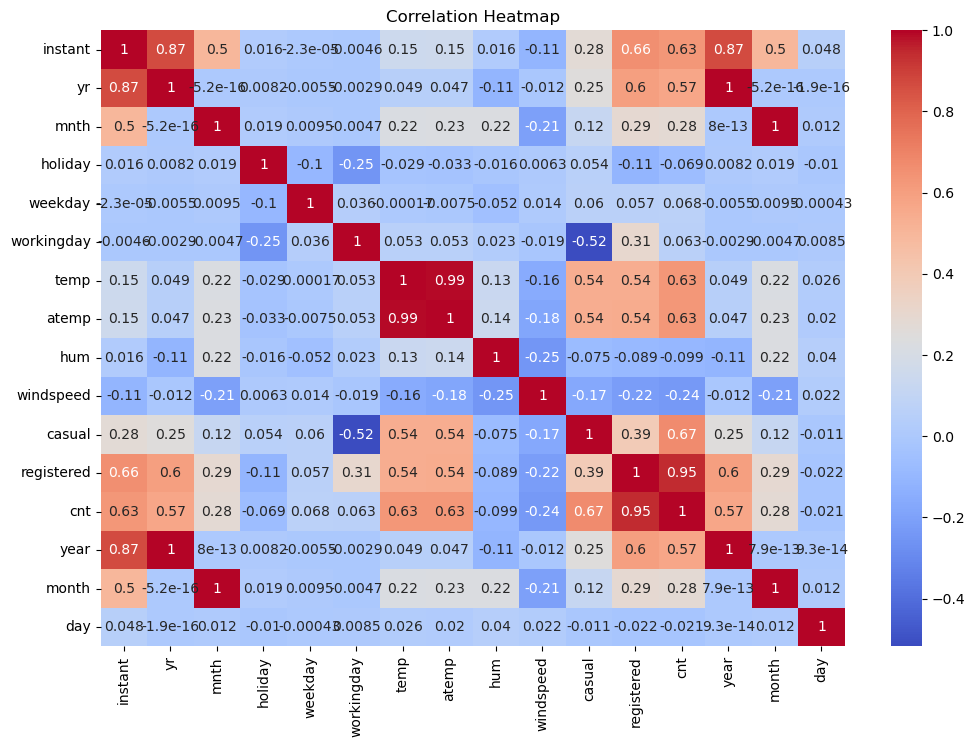

In [19]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
# Data Preparation
# Drop unnecessary columns
bike_data.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)


In [21]:
# Create dummy variables for categorical data
bike_data = pd.get_dummies(bike_data, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)


In [25]:
# Splitting the data
X = bike_data.drop(['cnt'], axis=1)
y = bike_data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
# Model Building
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Evaluate model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


In [29]:
print(f"R-squared on Train Set: {train_r2}")
print(f"R-squared on Test Set: {test_r2}")


R-squared on Train Set: 0.8037754375749657
R-squared on Test Set: 0.7996982947310552


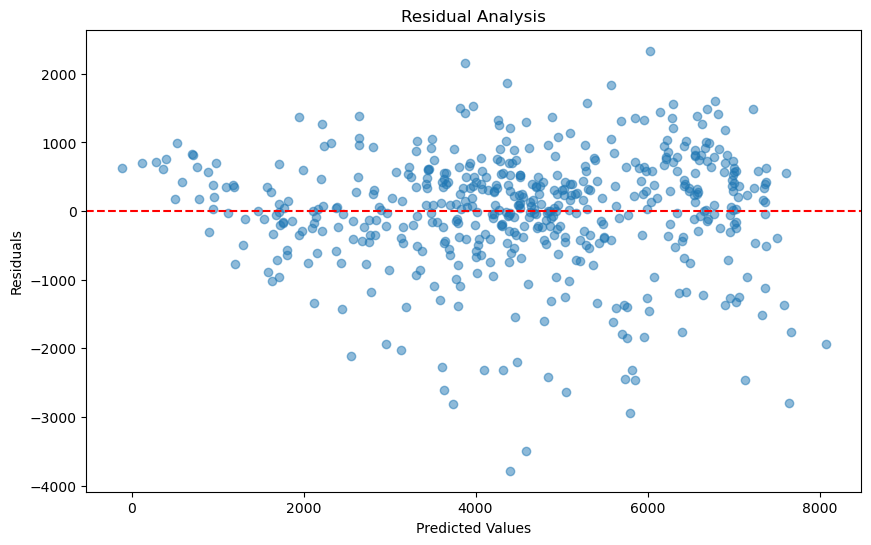

In [31]:
# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual Analysis")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


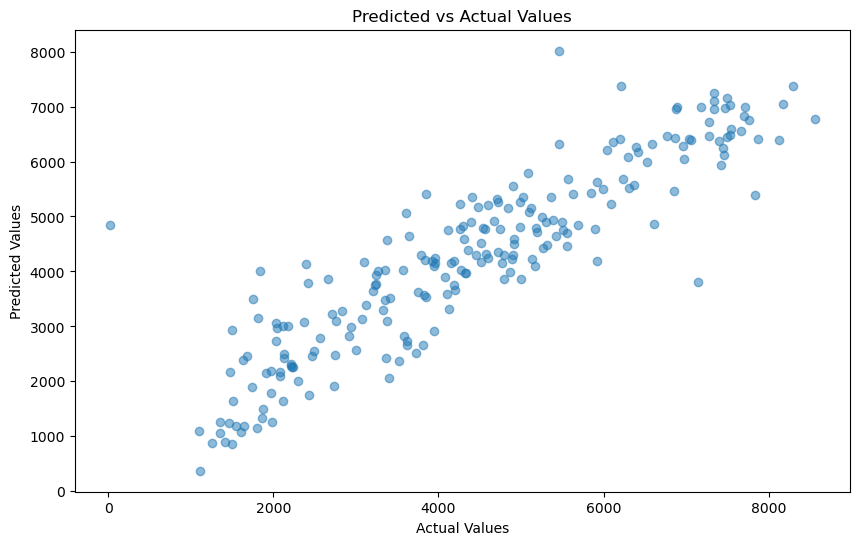

In [33]:
# Visualizing Predictions vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()
